Import packages.

In [7]:
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from signal_autoencoder.dataloading import SeismicSignals
from signal_autoencoder.modeling import ConvAutoencoder

Load embeddings.

In [8]:
embeddings = torch.load('../data/embeddings.pt', map_location=torch.device('cpu'))
embeddings = embeddings.squeeze().numpy()

print('Shape of embeddings:', embeddings.shape)

Shape of embeddings: (48669, 256)


Load dataloader for event metadata.

In [9]:
dataloader = torch.load('../data/dataloader.pth')
event_ids = np.array([f.split('_')[0] for f in dataloader.dataset.files])
df_event = pd.read_csv('../data/events.csv')
event_types = np.array([
    df_event.loc[df_event['eventID'] == int(i), 'event_type'].item()
    for i in event_ids
])

Visualize signal and its reconstruction.

In [10]:
dataset = SeismicSignals('../data', df_event)
dataset.set_mean_and_std(dataloader.dataset.mean, dataloader.dataset.std)

n_conv_channel_1 = 128
n_conv_channel_2 = 256
n_conv_channel_3 = 512
n_conv_channel_4 = 1024
model = ConvAutoencoder(3, n_conv_channel_1, n_conv_channel_2,
                        n_conv_channel_3, n_conv_channel_4)
checkpoint = torch.load('../scripts/autoencoder.pt', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint['model_state_dict'])

i = random.randint(0, len(dataset))

x, _ = dataset.__getitem__(i)
with torch.no_grad():
    y = model(x[None,:,:])
    y = y.squeeze()

plt.plot(x[:,0])
plt.show()
plt.plot(y[:,0])
plt.show()

RuntimeError: Error(s) in loading state_dict for ConvAutoencoder:
	Missing key(s) in state_dict: "encoder.enc.6.weight", "encoder.enc.6.bias", "encoder.enc.7.weight", "encoder.enc.7.bias", "encoder.enc.7.running_mean", "encoder.enc.7.running_var", "encoder.enc.10.weight", "encoder.enc.10.bias", "encoder.enc.11.weight", "encoder.enc.11.bias", "encoder.enc.11.running_mean", "encoder.enc.11.running_var", "encoder.enc.13.weight", "encoder.enc.13.bias", "encoder.enc.13.running_mean", "encoder.enc.13.running_var", "encoder.enc.16.weight", "encoder.enc.16.bias", "encoder.enc.17.weight", "encoder.enc.17.bias", "encoder.enc.17.running_mean", "encoder.enc.17.running_var", "encoder.enc.18.weight", "encoder.enc.18.bias", "encoder.enc.19.weight", "encoder.enc.19.bias", "encoder.enc.19.running_mean", "encoder.enc.19.running_var", "encoder.enc.22.weight", "encoder.enc.22.bias", "encoder.enc.23.weight", "encoder.enc.23.bias", "encoder.enc.23.running_mean", "encoder.enc.23.running_var", "decoder.dec.6.weight", "decoder.dec.6.bias", "decoder.dec.7.weight", "decoder.dec.7.bias", "decoder.dec.7.running_mean", "decoder.dec.7.running_var", "decoder.dec.10.weight", "decoder.dec.10.bias", "decoder.dec.11.weight", "decoder.dec.11.bias", "decoder.dec.11.running_mean", "decoder.dec.11.running_var", "decoder.dec.13.weight", "decoder.dec.13.bias", "decoder.dec.13.running_mean", "decoder.dec.13.running_var", "decoder.dec.16.weight", "decoder.dec.16.bias", "decoder.dec.17.weight", "decoder.dec.17.bias", "decoder.dec.17.running_mean", "decoder.dec.17.running_var", "decoder.dec.18.weight", "decoder.dec.18.bias", "decoder.dec.19.weight", "decoder.dec.19.bias", "decoder.dec.19.running_mean", "decoder.dec.19.running_var", "decoder.dec.22.weight", "decoder.dec.22.bias", "decoder.dec.23.weight", "decoder.dec.23.bias", "decoder.dec.23.running_mean", "decoder.dec.23.running_var". 
	Unexpected key(s) in state_dict: "encoder.enc.8.weight", "encoder.enc.8.bias", "encoder.enc.9.weight", "encoder.enc.9.bias", "encoder.enc.9.running_mean", "encoder.enc.9.running_var", "encoder.enc.9.num_batches_tracked", "decoder.dec.8.weight", "decoder.dec.8.bias", "decoder.dec.9.weight", "decoder.dec.9.bias", "decoder.dec.9.running_mean", "decoder.dec.9.running_var", "decoder.dec.9.num_batches_tracked". 
	size mismatch for encoder.enc.4.weight: copying a param with shape torch.Size([256, 128, 3]) from checkpoint, the shape in current model is torch.Size([128, 128, 3]).
	size mismatch for encoder.enc.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.enc.5.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.enc.5.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.enc.5.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.enc.5.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([128]).
	size mismatch for encoder.enc.12.weight: copying a param with shape torch.Size([1024, 512, 3]) from checkpoint, the shape in current model is torch.Size([512, 256, 3]).
	size mismatch for encoder.enc.12.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.dec.4.weight: copying a param with shape torch.Size([256, 512, 3]) from checkpoint, the shape in current model is torch.Size([512, 512, 3]).
	size mismatch for decoder.dec.4.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.dec.5.weight: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.dec.5.bias: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.dec.5.running_mean: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.dec.5.running_var: copying a param with shape torch.Size([256]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for decoder.dec.12.weight: copying a param with shape torch.Size([3, 128, 3]) from checkpoint, the shape in current model is torch.Size([128, 256, 3]).
	size mismatch for decoder.dec.12.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([128]).

There are two types of event: earthquare, nuclear explosion.

Let's predict the event type from its signal embeddings.

In [ ]:
print('Number of signals by event type:')
print('- earthquake:', len(event_ids[event_types == 'earthquake']))
print('- nuclear explosion:', len(event_ids[event_types == 'nuclear explosion']))

Number of signals by event type:
- earthquake: 48638
- nuclear explosion: 31


The data is highly imbalanced

Split events for training and test.

In [ ]:
train_events, test_events = train_test_split(df_event['eventID'].values,
                                             stratify=df_event['event_type'])

is_train = np.isin(event_ids, train_events)
is_test = np.isin(event_ids, test_events)

Train a logistic regression.

In [ ]:
X_train = embeddings[is_train]
X_test = embeddings[is_test]
y_train = event_types[is_train]
y_test = event_types[is_test]

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print('Accuracy:')
print('- training', lr.score(X_train, y_train))
print('- test', lr.score(X_test, y_test))
print('')
print('Test confusion matrix:')
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))

Accuracy:
- training 0.7024985774145155
- test 0.7030078944738682

Test confusion matrix:
[[7032 2970]
 [   2    3]]


Visualize the logistic regression coefficients.

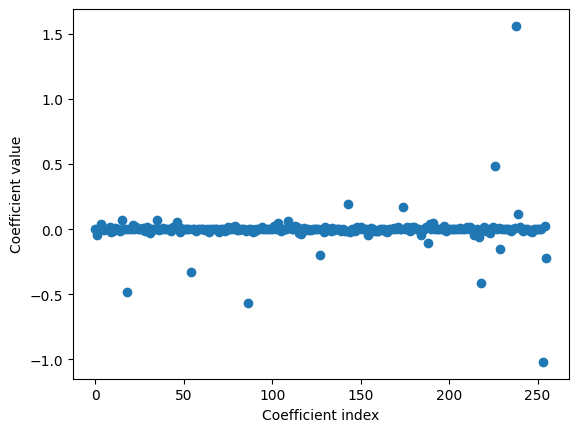

In [ ]:
plt.scatter(range(len(lr.coef_.flatten())), lr.coef_)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient value')
plt.show()

Let's predict the event type using the corresponding best embedding dimension only.

In [ ]:
best_coef = np.argmax(np.abs(lr.coef_))

In [ ]:
embeddings_1d = embeddings[:,best_coef]
X_train = embeddings_1d[is_train].reshape(-1, 1)
X_test = embeddings_1d[is_test].reshape(-1, 1)
y_train = event_types[is_train]
y_test = event_types[is_test]

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print('Accuracy:')
print('- training', lr.score(X_train, y_train))
print('- test', lr.score(X_test, y_test))
print('')
print('Test confusion matrix:')
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))


Accuracy:
- training 0.7018002172676012
- test 0.7026081742780054

Test confusion matrix:
[[7028 2974]
 [   2    3]]
